In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-200')

In [ ]:
filename='pima-indians-diabetes.data.csv'
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
df=read_csv(filename,names=names)
df.head(30)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0495aabc90>,
      dtype=object)

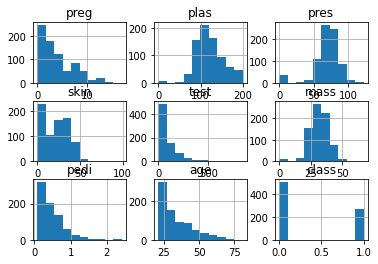

In [ ]:
df.hist()

DataFrame.values Pandas DataFrame.values возвращает Numpy-представление данного DataFrame.
Используйте атрибут DataFrame.values чтобы возвратить пустое представление данного DataFrame.

In [ ]:
array = df.values
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
X = array[:,:8]
Y = array[:,8]

In [ ]:
Y.shape

(768,)

**масштабирование:**

In [ ]:
from pandas.core.apply import FrameApply
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
rescaledX=scaler.fit_transform(X)
rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
set_printoptions(precision=3)

In [ ]:
rescaledX

array([[0.353, 0.744, 0.59 , ..., 0.501, 0.234, 0.483],
       [0.059, 0.427, 0.541, ..., 0.396, 0.117, 0.167],
       [0.471, 0.92 , 0.525, ..., 0.347, 0.254, 0.183],
       ...,
       [0.294, 0.608, 0.59 , ..., 0.39 , 0.071, 0.15 ],
       [0.059, 0.633, 0.492, ..., 0.449, 0.116, 0.433],
       [0.059, 0.467, 0.574, ..., 0.453, 0.101, 0.033]])

In [ ]:
scaler=StandardScaler().fit(X) # создаем объект и обучаем

In [ ]:
rescaledX=scaler.transform(X) # преобразуем данные

In [ ]:
rescaledX[:5,:]

array([[ 0.64 ,  0.848,  0.15 ,  0.907, -0.693,  0.204,  0.468,  1.426],
       [-0.845, -1.123, -0.161,  0.531, -0.693, -0.684, -0.365, -0.191],
       [ 1.234,  1.944, -0.264, -1.288, -0.693, -1.103,  0.604, -0.106],
       [-0.845, -0.998, -0.161,  0.155,  0.123, -0.494, -0.921, -1.042],
       [-1.142,  0.504, -1.505,  0.907,  0.766,  1.41 ,  5.485, -0.02 ]])

In [ ]:
import pandas as pd
fg = pd.DataFrame(rescaledX)
fg.head(15)

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


In [ ]:
import numpy as np

**цикл который меняет выбросы (значения превышающие 3 стандартных отклонения) на NaN во всех столбцах:**

In [ ]:
for i in fg:
    fg[i] = np.where((fg[i] > 3) | (fg[i] < -3), np.nan, fg[i])
fg.head(15)

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,NaN,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,NaN,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,NaN,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,NaN,-0.724455,1.766346


In [ ]:
fgY = pd.DataFrame(Y)
fgY.head(5)

,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


In [ ]:
fg['end'] = fgY

In [ ]:
fg.head(5)

,0,1,2,3,4,5,6,7,end
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,NaN,-0.020496,1.0


In [ ]:
fg_groupby = fg.sort_values(by=['end',3]) # упорядочиваем данные по результирующим признакаам

In [ ]:
fg_groupby.isna().sum()

0       4
1       5
2      35
3       1
4      18
5      14
6      11
7       5
end     0
dtype: int64

In [ ]:
fg_groupby['end'].value_counts()

0.0    500
1.0    268
Name: end, dtype: int64

In [ ]:
fg_groupby.head(20)

,0,1,2,3,4,5,6,7,end
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,0.0
7,1.827813,-0.184482,NaN,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,0.0
10,0.046014,-0.340968,1.183596,-1.288212,-0.692891,0.711690,-0.848280,-0.275760,0.0
12,1.827813,0.566649,0.563223,-1.288212,-0.692891,-0.620962,2.926869,2.021610,0.0
21,1.233880,-0.685236,0.770014,-1.288212,-0.692891,0.432467,-0.253316,1.425995,0.0
29,0.342981,-0.121888,1.183596,-1.288212,-0.692891,0.267472,-0.407342,0.404942,0.0
33,0.639947,-0.904316,1.183596,-1.288212,-0.692891,-1.534781,-0.857340,-0.445935,0.0
36,2.124780,0.535352,0.356432,-1.288212,-0.692891,0.153245,-0.156673,0.149679,0.0
41,0.936914,0.378867,0.770014,-1.288212,-0.692891,1.041680,0.676880,0.319855,0.0
44,0.936914,1.192592,-0.263941,-1.288212,-0.692891,-0.582887,-0.537208,0.575118,0.0


In [ ]:
fg_groupby = fg_groupby.fillna(method ='pad') # заменяем NaN на предыдущее значение в столбце
# методы Значение параметра метода: {‘pad’, ‘ffill’,‘backfill’, ‘bfill’, None}, default None
#pad/ffill: использование предыдущий Не пропущенное значение, чтобы заполнить пропущенное значение
#backfill/bfill: использование следующий Заполните пропущенное значение не пропущенным значением
#None: Укажите значение для замены отсутствующего значения (по умолчанию это так)

In [ ]:
fg_groupby.head(20)

,0,1,2,3,4,5,6,7,end
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,0.0
7,1.827813,-0.184482,0.253036,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,0.0
10,0.046014,-0.340968,1.183596,-1.288212,-0.692891,0.711690,-0.848280,-0.275760,0.0
12,1.827813,0.566649,0.563223,-1.288212,-0.692891,-0.620962,2.926869,2.021610,0.0
21,1.233880,-0.685236,0.770014,-1.288212,-0.692891,0.432467,-0.253316,1.425995,0.0
29,0.342981,-0.121888,1.183596,-1.288212,-0.692891,0.267472,-0.407342,0.404942,0.0
33,0.639947,-0.904316,1.183596,-1.288212,-0.692891,-1.534781,-0.857340,-0.445935,0.0
36,2.124780,0.535352,0.356432,-1.288212,-0.692891,0.153245,-0.156673,0.149679,0.0
41,0.936914,0.378867,0.770014,-1.288212,-0.692891,1.041680,0.676880,0.319855,0.0
44,0.936914,1.192592,-0.263941,-1.288212,-0.692891,-0.582887,-0.537208,0.575118,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0492dca610>,
      dtype=object)

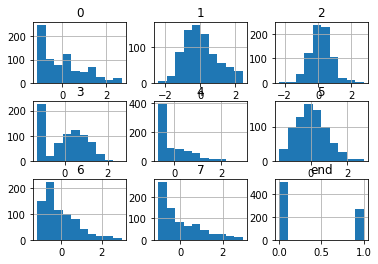

In [ ]:
fg_groupby.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04951e0a50>,
      dtype=object)

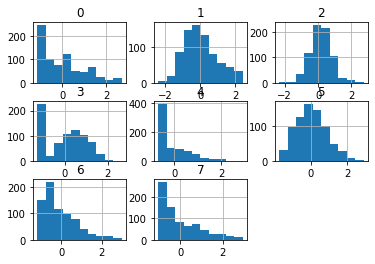

In [ ]:
fg.hist()

In [ ]:
fg.shape

(768, 8)

In [ ]:
scaler=Normalizer().fit(X)

In [ ]:
rescaledX=scaler.transform(X) # преобразуем данные

In [ ]:
rescaledX[:5,:]

array([[0.034, 0.828, 0.403, 0.196, 0.   , 0.188, 0.004, 0.28 ],
       [0.008, 0.716, 0.556, 0.244, 0.   , 0.224, 0.003, 0.261],
       [0.04 , 0.924, 0.323, 0.   , 0.   , 0.118, 0.003, 0.162],
       [0.007, 0.588, 0.436, 0.152, 0.622, 0.186, 0.001, 0.139],
       [0.   , 0.596, 0.174, 0.152, 0.731, 0.188, 0.01 , 0.144]])

In [ ]:
scaler=Binarizer(threshold=0.0).fit(X)

In [ ]:
rescaledX=scaler.transform(X) # преобразуем данные

In [ ]:
rescaledX[:5,:]

array([[1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.]])

**2.отбор_признаков**

In [ ]:
fg_groupby

,0,1,2,3,4,5,6,7,end
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,0.0
7,1.827813,-0.184482,0.253036,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,0.0
10,0.046014,-0.340968,1.183596,-1.288212,-0.692891,0.711690,-0.848280,-0.275760,0.0
12,1.827813,0.566649,0.563223,-1.288212,-0.692891,-0.620962,2.926869,2.021610,0.0
21,1.233880,-0.685236,0.770014,-1.288212,-0.692891,0.432467,-0.253316,1.425995,0.0
...,...,...,...,...,...,...,...,...,...
693,0.936914,0.253678,-0.057150,1.785463,0.392471,0.825917,-0.099290,0.830381,1.0
99,-0.844885,0.034598,1.080200,1.910919,1.217347,2.247413,-0.443584,-0.190672,1.0
120,-1.141852,1.286484,0.356432,2.224559,0.175399,2.691630,0.867148,-0.701198,1.0
445,-1.141852,1.849832,0.459827,2.663656,-0.571330,2.691630,0.867148,-0.701198,1.0


In [ ]:
array = fg_groupby.values
array

array([[ 0.343, -0.153,  0.253, ..., -0.818, -0.276,  0.   ],
       [ 1.828, -0.184,  0.253, ..., -1.02 , -0.361,  0.   ],
       [ 0.046, -0.341,  1.184, ..., -0.848, -0.276,  0.   ],
       ...,
       [-1.142,  1.286,  0.356, ...,  0.867, -0.701,  1.   ],
       [-1.142,  1.85 ,  0.46 , ...,  0.867, -0.701,  1.   ],
       [-0.548,  2.382,  0.046, ...,  0.311,  2.447,  1.   ]])

In [ ]:
X = array[:,:8]
Y = array[:,8]

# **ОТБОР ПРИЗНАКОВ НА ДАННЫХ БЕЗ ВЫБРОСОВ(очищенных)**

**1-й метод отбора признаков**

In [ ]:
test = SelectKBest(score_func=f_classif, k=4)

In [ ]:
fit=test.fit(X,Y)

In [ ]:
fit.scores_

array([ 33.698, 245.153,  22.123,   3.94 ,   8.468,  85.053,  32.386,
        53.234])

**если все признаки ценны, то проводим факторный анализ**

In [ ]:
features=fit.transform(X)

In [ ]:
features[:5,:]

array([[ 0.343, -0.153, -0.811, -0.276],
       [ 1.828, -0.184,  0.42 , -0.361],
       [ 0.046, -0.341,  0.712, -0.276],
       [ 1.828,  0.567, -0.621,  2.022],
       [ 1.234, -0.685,  0.432,  1.426]])

**2-й метод отбора признаков**

In [ ]:
model=LogisticRegression(solver='liblinear')

In [ ]:
rfe=RFE(model,n_features_to_select=5)

In [ ]:
fit=rfe.fit(X,Y)

In [ ]:
fit.n_features_

5

In [ ]:
fit.support_

array([ True,  True, False, False, False,  True,  True,  True])

In [ ]:
fit.ranking_

array([1, 1, 3, 4, 2, 1, 1, 1])

In [ ]:
rfe.fit_transform(X,Y)

array([[ 0.343, -0.153, -0.811, -0.818, -0.276],
       [ 1.828, -0.184,  0.42 , -1.02 , -0.361],
       [ 0.046, -0.341,  0.712, -0.848, -0.276],
       ...,
       [-1.142,  1.286,  2.692,  0.867, -0.701],
       [-1.142,  1.85 ,  2.692,  0.867, -0.701],
       [-0.548,  2.382,  0.344,  0.311,  2.447]])

**снижение размерности**

In [ ]:
pca=PCA(n_components=5)

In [ ]:
fit=pca.fit(X)

In [ ]:
fit.explained_variance_ratio_ # выподит степень влияния каждой компоненты на результат

array([0.265, 0.247, 0.124, 0.109, 0.095])

In [ ]:
fit.components_ # выводит коэффициент корреляции между каждой компонентой и
                # каждым факторным признаком

array([[ 0.595,  0.386,  0.224, -0.046,  0.008,  0.155,  0.088,  0.643],
       [-0.173,  0.296,  0.034,  0.666,  0.432,  0.412,  0.259, -0.121],
       [ 0.418, -0.778, -0.031,  0.445, -0.056,  0.065,  0.063,  0.099],
       [-0.007, -0.05 , -0.155, -0.155,  0.14 , -0.388,  0.881,  0.052],
       [-0.208, -0.143,  0.295, -0.233, -0.495,  0.644,  0.365, -0.041]])

In [ ]:
pca.fit_transform(X)

array([[-0.145, -1.75 , -0.379, -0.241, -0.24 ],
       [ 0.845, -1.552,  0.325, -0.91 ,  0.178],
       [ 0.048, -1.103, -0.289, -0.991,  1.093],
       ...,
       [-0.186,  3.582, -0.315, -0.638,  1.536],
       [ 0.029,  3.722, -0.519, -0.855,  1.753],
       [ 2.104,  2.216, -0.541, -0.256, -0.352]])

In [ ]:
model=ExtraTreesClassifier(n_estimators=100)

In [ ]:
model.fit(X,Y)

ExtraTreesClassifier()

In [ ]:
model.feature_importances_

array([0.105, 0.228, 0.1  , 0.08 , 0.072, 0.15 , 0.123, 0.143])